In [1]:
import pickle
import pandas as pd

with open('my_dataframe_newfeatures.pickle','rb') as read_file:
    df_target = pickle.load(read_file)

In [2]:
# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np


def get_user_split_data(df, test_size=.2, seed=42):

    rs = np.random.RandomState(seed)
    
    total_users = df['card_id'].unique() 
    test_users = rs.choice(total_users, 
                           size=int(total_users.shape[0] * test_size), 
                           replace=False)

    df_tr = df[~df['card_id'].isin(test_users)]
    df_te = df[df['card_id'].isin(test_users)] 

    y_tr, y_te = df_tr['target_binned'], df_te['target_binned']
    X_tr = df_tr[['installments','purchase_amount','category_2','feature_2_2', 'feature_2_3', 'feature_3_1','auth_flag_Y']] 
    X_te = df_te[['installments','purchase_amount','category_2','feature_2_2', 'feature_2_3', 'feature_3_1','auth_flag_Y']]

    return X_tr, X_te, y_tr, y_te

X_tr, X_te, y_tr, y_te = get_user_split_data(df_target)


In [3]:
len(X_tr)

11039501

In [4]:
# X_tr = X_tr.iloc[0: 100000, :]
# y_tr = y_tr[0: 100000]

In [5]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', C = 1)
lr.fit(X_tr, y_tr)
accuracy_score(lr.predict(X_te), y_te)

/Users/zhaoze/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zhaoze/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


0.6501787042620526

In [6]:
cm = confusion_matrix(y_te, lr.predict(X_te)) 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    return fig

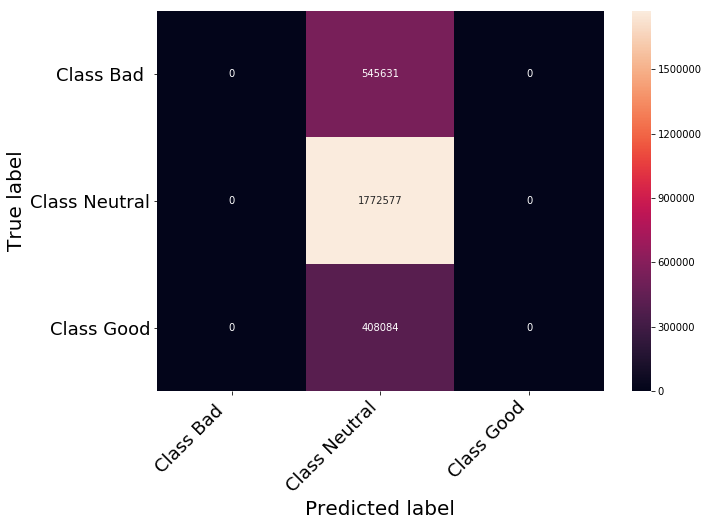

In [8]:
cm = print_confusion_matrix(confusion_matrix(y_te,lr.predict(X_te)), ['Class Bad ', 'Class Neutral', 'Class Good'])